In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
diabetes = datasets.load_diabetes()

In [48]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [49]:
df['target'] = pd.DataFrame(diabetes.target)

In [50]:
summary_stats = df[['age', 'sex', 'bmi', 'bp', 'target']].describe()

In [51]:
summary_stats

,age,sex,bmi,bp,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,346.000000


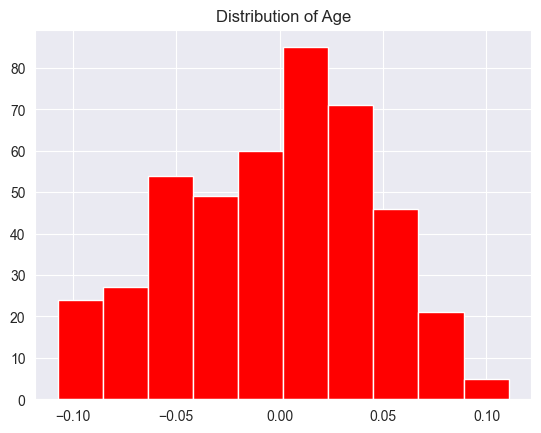

In [52]:
plt.hist(df['age'], color='r')
plt.title("Distribution of Age")
plt.show()

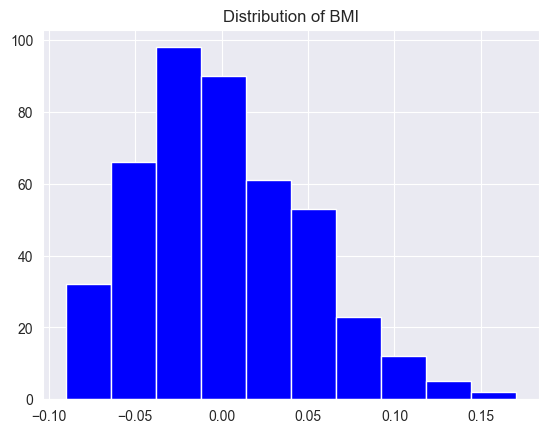

In [53]:
plt.hist(df['bmi'], color='b')
plt.title("Distribution of BMI")
plt.show()

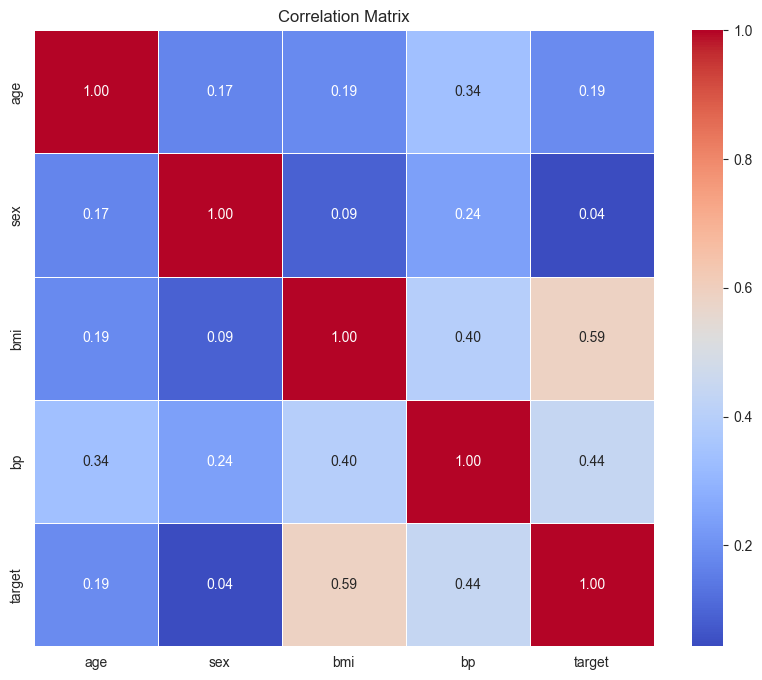

In [54]:
correlation_matrix = df[['age', 'sex', 'bmi', 'bp', 'target']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='bmi', ylabel='target'>

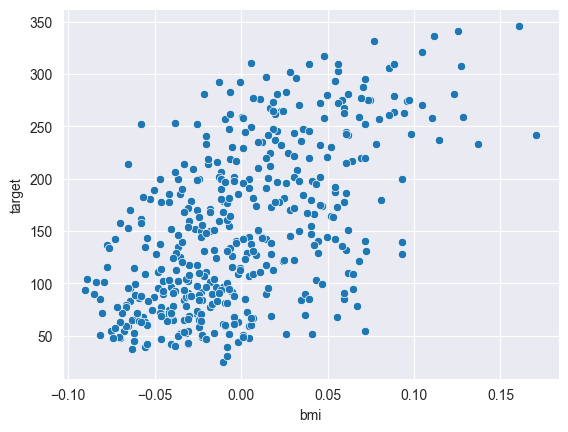

In [55]:
sns.scatterplot(x = df['bmi'], y = df['target'])

In [56]:
X = df[['age', 'sex', 'bmi', 'bp']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

coefficients = lr.coef_
intercept = lr.intercept_

for feature, coef in zip(X.columns, coefficients):
    print(f"The coefficient for {feature} is {coef:.2f}")

age_coef = coefficients[0]  # Assuming 'age' is the first column in X
print(f"\nInterpretation: A coefficient of {age_coef:.2f} for 'age' means that for every one-year increase in age, the target variable is expected to change by approximately {age_coef:.2f} units, holding other factors constant.")

The coefficient for age is 6.18
The coefficient for sex is -84.83
The coefficient for bmi is 842.68
The coefficient for bp is 407.39

Interpretation: A coefficient of 6.18 for 'age' means that for every one-year increase in age, the target variable is expected to change by approximately 6.18 units, holding other factors constant.


In [57]:
import random

def roll_biased_die(sequence):
    return random.choice(sequence)

def simulate_rolls(num_simulations, sequence):
    return [roll_biased_die(sequence) for _ in range(num_simulations)]

def calculate_probability(results, target_value):
    count_target = results.count(target_value)
    return count_target / len(results)
sequence = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6]
num_simulations = 100
results = simulate_rolls(num_simulations, sequence)
probability_of_3 = calculate_probability(results, 3)
print(f"Probability of rolling a 3: {probability_of_3:.2f}")

Probability of rolling a 3: 0.24
